In [1]:
import numpy as np
import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
base = pd.read_csv('../Data/BaseData.csv')

In [4]:
base.shape

(2580, 299)

In [5]:
gbm = GradientBoostingRegressor()

In [6]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [7]:
gbm.fit(X,y)

GradientBoostingRegressor()

In [8]:
gbm.score(X,y)

0.963814292526382

In [9]:
X_cols = base.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.4865024860842125),
 ('GrLivArea', 0.16547510538022295),
 ('TotalBsmtSF', 0.0519297135564174),
 ('YearBuilt', 0.04853573497584956),
 ('1stFlrSF', 0.046597213835743986),
 ('BsmtFinSF1', 0.034634993162830606),
 ('GarageArea', 0.03181680792056865),
 ('Fireplaces', 0.016587106569037852),
 ('GarageCars', 0.016196202490314865),
 ('LotArea', 0.013777114797778153),
 ('YearRemodAdd', 0.011087615021397448),
 ('2ndFlrSF', 0.011065679434226868),
 ('OverallCond', 0.008642737687892973),
 ('MSSubClass_60', 0.006067422146754832),
 ('KitchenQual_TA', 0.006027160540520036),
 ('FireplaceQu_None', 0.005179384712364848),
 ('CentralAir_Y', 0.003339361575049342),
 ('MasVnrArea', 0.00303766052887361),
 ('BsmtExposure_Gd', 0.0026032774116810076),
 ('ScreenPorch', 0.0023588675775050153),
 ('BsmtFullBath', 0.002277826975730768),
 ('Neighborhood_Crawfor', 0.0022439380366596337),
 ('PID', 0.002197937345416752),
 ('MSZoning_RL', 0.0018985382203336502),
 ('GarageType_Detchd', 0.0017542346565003228)

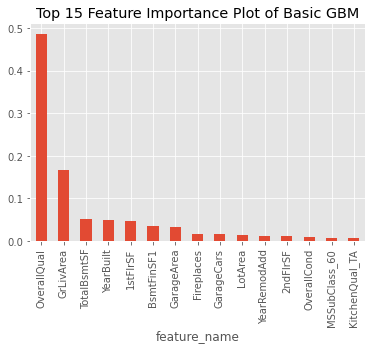

In [10]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

## No Scaling.....vs ##

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [36]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [37]:
gbm.score(X_train, y_train)

0.9686333180303556

In [38]:
gbm.score(X_test, y_test)

0.9119141799918922

In [39]:
predicted_value = gbm.predict(X_test)
true_value = y_test

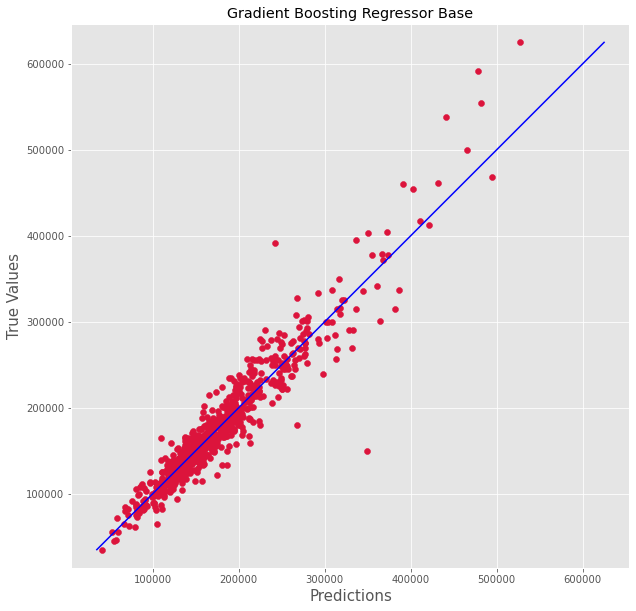

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Gradient Boosting Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()

## Scaling.... ##

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [43]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [44]:
gbm.score(X_train, y_train)

0.9692316519514993

In [45]:
gbm.score(X_test, y_test)

0.8620909161581889

In [46]:
X_cols = base.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.4488148985656704),
 ('GrLivArea', 0.13767815476620826),
 ('1stFlrSF', 0.06555811934126318),
 ('GarageCars', 0.06034975395741916),
 ('TotalBsmtSF', 0.058431386441158834),
 ('BsmtFinSF1', 0.03510662935935227),
 ('YearBuilt', 0.029514836392699032),
 ('GarageArea', 0.022235431113602322),
 ('FullBath', 0.015664361201478114),
 ('LotArea', 0.015183397994169784),
 ('YearRemodAdd', 0.013970335963689868),
 ('Fireplaces', 0.012020047387789121),
 ('MasVnrArea', 0.0078118482663272915),
 ('FireplaceQu_None', 0.007355987488343944),
 ('2ndFlrSF', 0.006859464413895766),
 ('OverallCond', 0.006530851928938904),
 ('GarageType_Detchd', 0.005038219340052487),
 ('BsmtFullBath', 0.0035963426762387492),
 ('BsmtFinType1_GLQ', 0.003389539188204519),
 ('BsmtQual_Gd', 0.0033315985526198534),
 ('MSSubClass_60', 0.0029188191458566805),
 ('CentralAir_Y', 0.0026781350423346773),
 ('KitchenQual_TA', 0.0026638718278789012),
 ('BsmtExposure_Gd', 0.0025587306139074266),
 ('PID', 0.002450981056932365),
 

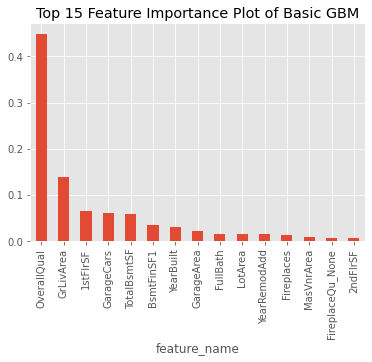

In [47]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [48]:
predicted_value = gbm.predict(X_test)

In [49]:
true_value = y_test

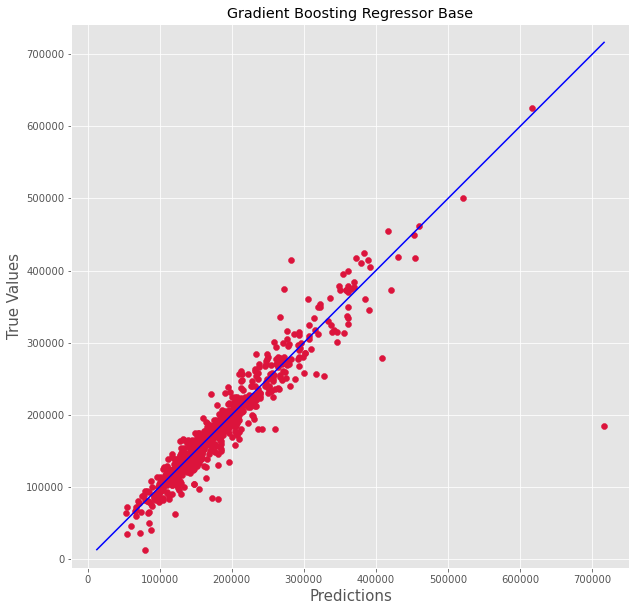

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Gradient Boosting Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()